feature_importances= [0.31555556 0.15555556 0.28       0.24888889]
playTennis when ['Overcast', 'Mild', 'Normal', 'Strong']??? [1]
[[0. 1.]]
cross validation scores [0.66666667 1.         1.         0.66666667 1.        ]
Ave accuracy 0.8666666666666666
Now training a RandomForest classifier...
feature_importances= [0.41161983 0.16159808 0.28944178 0.1373403 ]
playTennis when ['Overcast', 'Mild', 'Normal', 'Strong']??? [1]
cross validation scores [0.66666667 1.         0.66666667 0.33333333 0.5       ]
Ave accuracy 0.6333333333333333


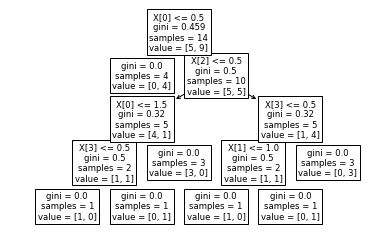

In [33]:
'''
Lab 1 (26 Sep 2019)
Supervised Learning 1 - Classification with Decision Trees

Data Analysis and Visualisation

'''

# import packages that we need...
from sklearn import preprocessing
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define input and output data...
outlook=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
humidity=['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High']
wind=['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# Encode the data...
label_encoder = preprocessing.LabelEncoder()

outlook_encoded= label_encoder.fit_transform(outlook)
temp_encoded= label_encoder.fit_transform(temp)
humidity_encoded= label_encoder.fit_transform(humidity)
wind_encoded= label_encoder.fit_transform(wind)
play_encoded = label_encoder.fit_transform(play)

features= list(zip(outlook_encoded,temp_encoded, humidity_encoded, wind_encoded)) 
features = np.asarray(features)
labels = np.asarray(play_encoded)

# define a classifier, train it, and predict a few examples
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(features, labels)

# TODO -- what might this do?
print("feature_importances=", classifier.feature_importances_)

print("playTennis when ['Overcast', 'Mild', 'Normal', 'Strong']???", classifier.predict([[1, 1, 1, 1]]))

# predict_proba will give us not just a single output label but a probability distribution over labels...
print(classifier.predict_proba([[1, 1, 1, 1]]))

# evaluate classifier using 5-fold CV
scores = cross_val_score(classifier, features, labels, cv=5)
print('cross validation scores', scores)
print('Ave accuracy', sum(scores)/len(scores))

# we can also now plot and visualise our decision tree - is it useful? 
tree.plot_tree(classifier.fit(features, labels)) 


print("Now training a RandomForest classifier...")

# Use the documentation here (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 
# to find out what all the parameters mean... can we tweak them get better performance? 

forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

forest = forest.fit(features, labels)  

print("feature_importances=", forest.feature_importances_)
print("playTennis when ['Overcast', 'Mild', 'Normal', 'Strong']???", forest.predict([[1, 1, 1, 1]]))

# evaluate forest classifier using 5-fold CV
scores = cross_val_score(forest, features, labels, cv=5)
print('cross validation scores', scores)
print('Ave accuracy', sum(scores)/len(scores))



